In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from tqdm import tqdm
from scipy.stats import loguniform

import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gufra\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gufra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Model_2p1

In [2]:
df = pd.read_csv("../dataset/9_class/training.csv")
df.dropna(inplace=True, axis=0)
# df.drop(columns="Unnamed: 0", axis=1, inplace=True)
df.head()

,tanya,jawab,kategori
0,umur saya masih 18 tahun saya tidak obesitasti...,"\n\n<p>Alo, terima kasih atas pertanyaannya un...",Menstruasi
1,hai saya berusia 16 tahun 3 bulan saya mempuny...,"\n\n<p>Selamat pagi, terima kasih telah bertan...",Gigi
2,jika saat saya melakukan sit up kenapa perut s...,"<p>Dear Azizi,\n\nSakit perut sebelah kiri bag...",Cedera
3,belakangan ini saya mengalami diare tapi susah...,"\n\n<p>Alo Adi,</p>\n<p>Terima kasih atas pert...",Demam
4,ter saya perempuan berusia 12 tahun sampe saat...,"\n\n<p>Alo, terimakasih atas pertanyaannya.</p...",Menstruasi


In [3]:
label = {
    'Asam Lambung': 0,
    'Batuk': 1, 
    'Cedera': 2, 
    'Demam': 3,
    'Gatal': 4, 
    'Gigi': 5, 
    'Jerawat': 6, 
    'Menstruasi': 7, 
    'Sakit Kepala': 8
}

In [4]:
df['kategori'] = df['kategori'].map(label)
df.head()

,tanya,jawab,kategori
0,umur saya masih 18 tahun saya tidak obesitasti...,"\n\n<p>Alo, terima kasih atas pertanyaannya un...",7
1,hai saya berusia 16 tahun 3 bulan saya mempuny...,"\n\n<p>Selamat pagi, terima kasih telah bertan...",5
2,jika saat saya melakukan sit up kenapa perut s...,"<p>Dear Azizi,\n\nSakit perut sebelah kiri bag...",2
3,belakangan ini saya mengalami diare tapi susah...,"\n\n<p>Alo Adi,</p>\n<p>Terima kasih atas pert...",3
4,ter saya perempuan berusia 12 tahun sampe saat...,"\n\n<p>Alo, terimakasih atas pertanyaannya.</p...",7


In [5]:
# def preprocessing(text):
#     text =  re.sub(r'[\n+]', '', str(text))
#     text =  re.sub(r'[^\w\s]', '', text)
#     text =  re.sub(r'[^\x00-\x7F]+', '', text)
#     text =  re.sub(r'(pagi|siang|sore)', '', text, flags=re.IGNORECASE)
#     text =  re.sub(r'(dok|dokter)', '', text, flags=re.IGNORECASE)
#     text =  re.sub(r'(terimakasih|terima kasih|alo|alodokter)', '', text, flags=re.IGNORECASE)
#     text =  re.sub(r'\s+', ' ', text).strip().lower()
    
#     return text

In [6]:
# df['tanya'] = [preprocessing(text_prep) for text_prep in tqdm(df.tanya, leave=False)]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    df.tanya, df.kategori, 
    test_size=0.3, 
    stratify=df.kategori,
    random_state=42
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((20157,), (8639,), (20157,), (8639,))

In [8]:
tfidf_vector = TfidfVectorizer()
X_train = tfidf_vector.fit_transform(X_train)
X_test = tfidf_vector.transform(X_test)

In [9]:
X_train = X_train.toarray()
X_test = X_test.toarray()

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling1D, Input, Embedding, LSTM, GlobalMaxPool1D, Bidirectional, Conv1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [11]:
model_2_1 = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation="relu"),
    Dense(9, activation='softmax')
])

model_2_1.compile(optimizer=Adam(0.0001),
              loss=SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model_2_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                2881088   
                                                                 
 dense_1 (Dense)             (None, 9)                 585       
                                                                 
Total params: 2881673 (10.99 MB)
Trainable params: 2881673 (10.99 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
epochs = 5
history_2_1 = model_2_1.fit(X_train, y_train, validation_data=(X_test, y_test), workers=-1, epochs=epochs)

Epoch 1/5
630/630 [==============================] - 17s 26ms/step - loss: 2.0786 - accuracy: 0.6897 - val_loss: 1.9171 - val_accuracy: 0.8029
Epoch 2/5
630/630 [==============================] - 11s 18ms/step - loss: 1.7172 - accuracy: 0.8513 - val_loss: 1.5196 - val_accuracy: 0.8407
Epoch 3/5
630/630 [==============================] - 11s 17ms/step - loss: 1.3103 - accuracy: 0.8764 - val_loss: 1.1647 - val_accuracy: 0.8529
Epoch 4/5
630/630 [==============================] - 11s 17ms/step - loss: 0.9886 - accuracy: 0.8877 - val_loss: 0.9202 - val_accuracy: 0.8594
Epoch 5/5
630/630 [==============================] - 11s 17ms/step - loss: 0.7698 - accuracy: 0.8958 - val_loss: 0.7626 - val_accuracy: 0.8627


In [13]:
# Evaluate the model_2_1
loss_train, accuracy_train = model_2_1.evaluate(X_train, y_train)
loss_test, accuracy_test = model_2_1.evaluate(X_test, y_test)

print(f'Train Loss: {loss_train}')
print(f'Train Accuracy: {accuracy_train*100:.2f}%\n')

print(f'Test Loss: {loss_test}')
print(f'Test Accuracy: {accuracy_test*100:.2f}%')

270/270 [==============================] - 1s 4ms/step - loss: 0.7626 - accuracy: 0.8627
Train Loss: 0.6753680109977722
Train Accuracy: 90.34%

Test Loss: 0.7626283764839172
Test Accuracy: 86.27%


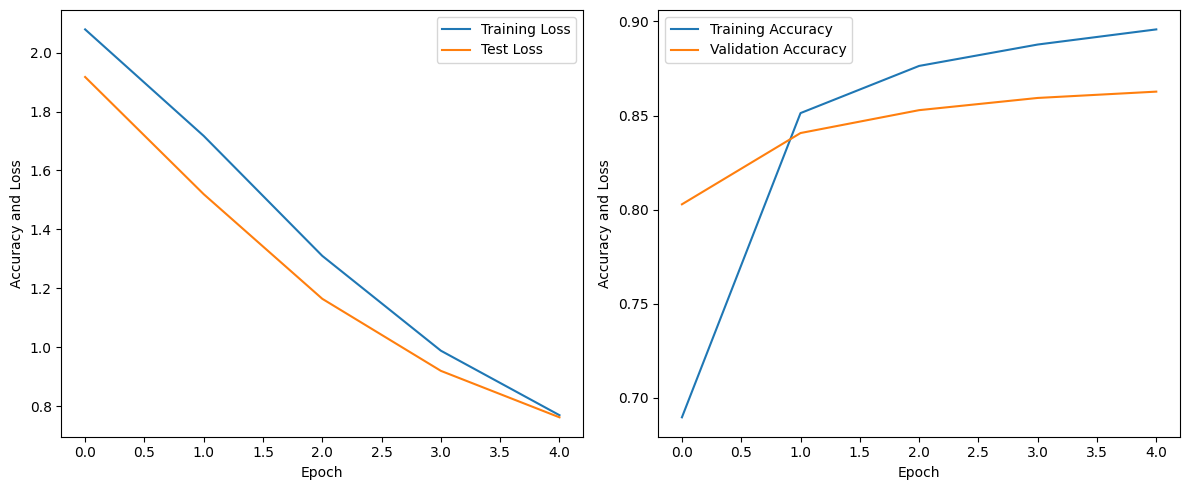

In [14]:
import sys
sys.path.append("../")
from helper import visualize_perform
visualize_perform(history_2_1)

In [15]:
prediction = model_2_1.predict(X_test)

actual = y_test.values

print(actual)
print(np.argmax(prediction, axis=1))

270/270 [==============================] - 1s 4ms/step
[5 4 4 ... 1 2 7]
[5 4 4 ... 1 2 7]


In [16]:
from sklearn.metrics import classification_report

report = classification_report(actual, np.argmax(prediction, axis=1), target_names=label)
print("Laporan Klasifikasi:\n", report)

Laporan Klasifikasi:
               precision    recall  f1-score   support

Asam Lambung       0.83      0.82      0.83       960
       Batuk       0.87      0.86      0.87       959
      Cedera       0.85      0.81      0.83       960
       Demam       0.79      0.71      0.75       960
       Gatal       0.89      0.90      0.89       960
        Gigi       0.96      0.96      0.96       960
     Jerawat       0.94      0.92      0.93       960
  Menstruasi       0.92      0.94      0.93       960
Sakit Kepala       0.74      0.84      0.79       960

    accuracy                           0.86      8639
   macro avg       0.86      0.86      0.86      8639
weighted avg       0.86      0.86      0.86      8639



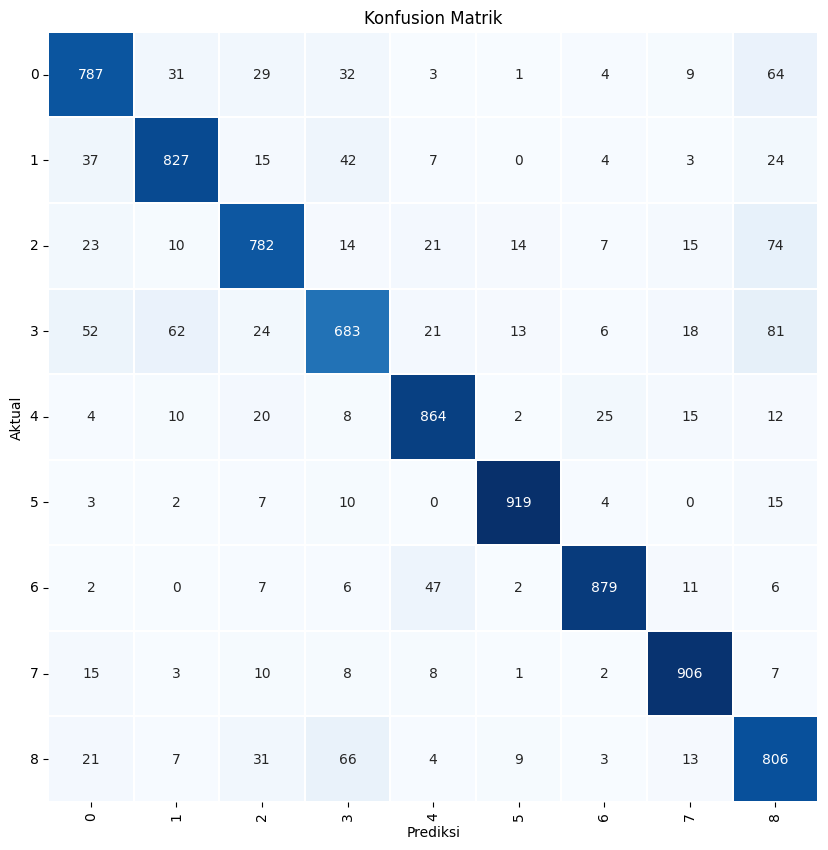

In [17]:
from helper import visualize_matrix
visualize_matrix(actual, prediction)

In [18]:
# model_2_1.save("../model/model_2p1_90_86.keras", save_format="keras")

# Model_2p2

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    df.tanya, df.kategori, 
    test_size=0.3, 
    stratify=df.kategori,
    random_state=42
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((20157,), (8639,), (20157,), (8639,))

In [20]:
# Inisialisasi TextVectorization layer
max_sequence_length = 100  # Panjang maksimum ulasan yang diizinkan
vectorize_layer = tf.keras.layers.TextVectorization(
    max_tokens=5000,  # Jumlah token unik yang diizinkan
    output_mode='int',
    output_sequence_length=max_sequence_length)

In [21]:
X_train = np.array(X_train, dtype=str)
X_test = np.array(X_test, dtype=str)

In [22]:
vectorize_layer.adapt(X_train)
# vectorize_layer.adapt(X_test)

In [23]:
model_2_2 = Sequential([
    vectorize_layer,
    Embedding(5000, max_sequence_length),
    GlobalMaxPool1D(),
    Dense(9, activation='softmax')
])

model_2_2.compile(optimizer=Adam(0.0003),
              loss=SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model_2_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVe  (None, 100)               0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, 100, 100)          500000    
                                                                 
 global_max_pooling1d (Glob  (None, 100)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense_2 (Dense)             (None, 9)                 909       
                                                                 
Total params: 500909 (1.91 MB)
Trainable params: 500909 (1.91 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
epochs = 10
history_2_2 = model_2_2.fit(X_train, y_train, validation_data=(X_test, y_test), workers=-1, epochs=epochs)

Epoch 1/10
630/630 [==============================] - 6s 8ms/step - loss: 2.0072 - accuracy: 0.6187 - val_loss: 1.6534 - val_accuracy: 0.8261
Epoch 2/10
630/630 [==============================] - 5s 8ms/step - loss: 1.1825 - accuracy: 0.8429 - val_loss: 0.8329 - val_accuracy: 0.8434
Epoch 3/10
630/630 [==============================] - 5s 7ms/step - loss: 0.6683 - accuracy: 0.8543 - val_loss: 0.5808 - val_accuracy: 0.8502
Epoch 4/10
630/630 [==============================] - 4s 7ms/step - loss: 0.5118 - accuracy: 0.8604 - val_loss: 0.4956 - val_accuracy: 0.8555
Epoch 5/10
630/630 [==============================] - 5s 8ms/step - loss: 0.4433 - accuracy: 0.8709 - val_loss: 0.4546 - val_accuracy: 0.8619
Epoch 6/10
630/630 [==============================] - 5s 7ms/step - loss: 0.4010 - accuracy: 0.8783 - val_loss: 0.4300 - val_accuracy: 0.8662
Epoch 7/10
630/630 [==============================] - 4s 7ms/step - loss: 0.3696 - accuracy: 0.8859 - val_loss: 0.4133 - val_accuracy: 0.8685
Epoch 

In [25]:
# Evaluate the model_2_2
loss_train, accuracy_train = model_2_2.evaluate(X_train, y_train)
loss_test, accuracy_test = model_2_2.evaluate(X_test, y_test)

print(f'Train Loss: {loss_train}')
print(f'Train Accuracy: {accuracy_train*100:.2f}%\n')

print(f'Test Loss: {loss_test}')
print(f'Test Accuracy: {accuracy_test*100:.2f}%')

270/270 [==============================] - 1s 2ms/step - loss: 0.3858 - accuracy: 0.8744
Train Loss: 0.2860468029975891
Train Accuracy: 90.91%

Test Loss: 0.3858115077018738
Test Accuracy: 87.44%


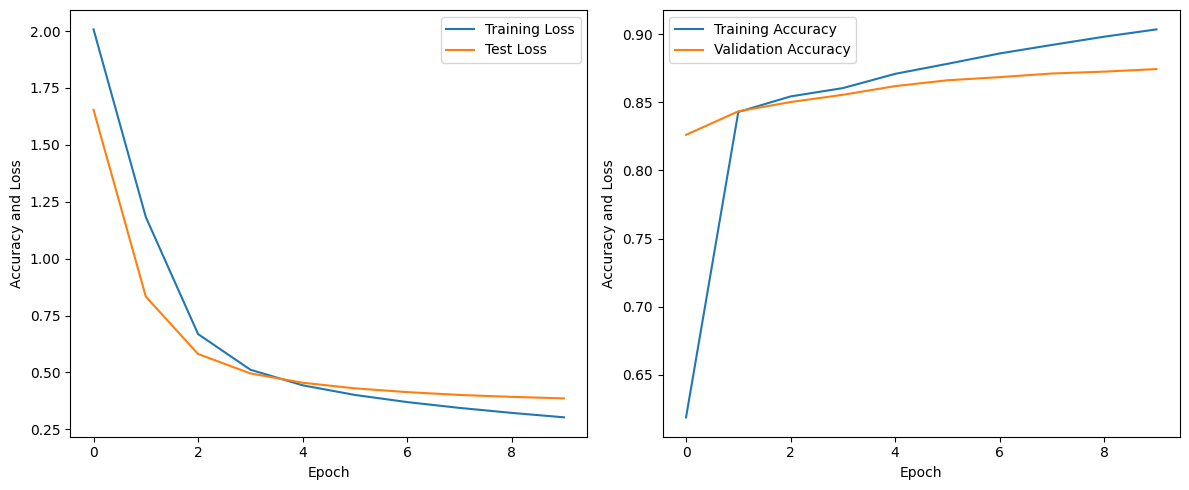

In [26]:
from helper import visualize_perform
visualize_perform(history_2_2)

In [27]:
prediction = model_2_2.predict(X_test)

actual = y_test.values

print(actual)
print(np.argmax(prediction, axis=1))

270/270 [==============================] - 1s 2ms/step
[5 4 4 ... 1 2 7]
[5 4 4 ... 1 2 7]


In [28]:
from sklearn.metrics import classification_report

report = classification_report(actual, np.argmax(prediction, axis=1), target_names=label)
print("Laporan Klasifikasi:\n", report)

Laporan Klasifikasi:
               precision    recall  f1-score   support

Asam Lambung       0.83      0.84      0.83       960
       Batuk       0.87      0.87      0.87       959
      Cedera       0.83      0.84      0.83       960
       Demam       0.78      0.76      0.77       960
       Gatal       0.92      0.92      0.92       960
        Gigi       0.96      0.96      0.96       960
     Jerawat       0.95      0.93      0.94       960
  Menstruasi       0.92      0.94      0.93       960
Sakit Kepala       0.82      0.82      0.82       960

    accuracy                           0.87      8639
   macro avg       0.87      0.87      0.87      8639
weighted avg       0.87      0.87      0.87      8639



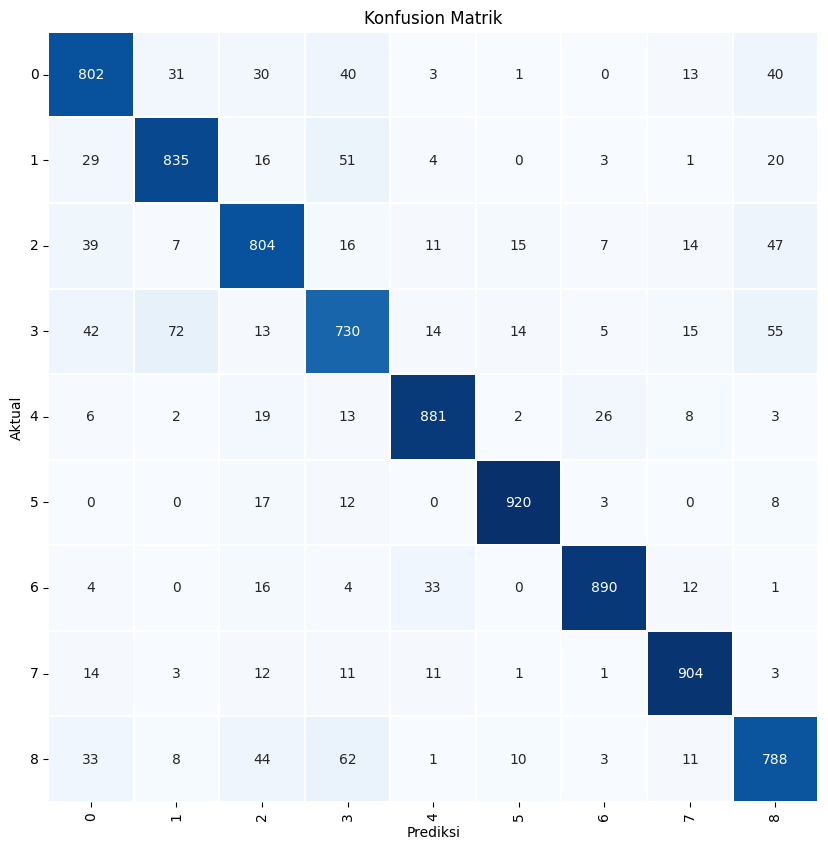

In [29]:
from helper import visualize_matrix
visualize_matrix(actual, prediction)

In [30]:
# model_2_2.save("../model/model_2p2_90_87.keras", save_format="keras")

# Model_2p3

In [31]:
from gensim.models import FastText
model_fasttext = FastText.load("../language_model/healthy_chat_13_labels.bin")
model_fasttext = model_fasttext.wv

In [32]:
from word_sent import WordToSentVector

model = WordToSentVector(df.tanya, model_fasttext)
model = model.fit()

100%|██████████| 28796/28796 [00:05<00:00, 4895.90it/s]


In [33]:
X_train, X_test, y_train, y_test = train_test_split(model, df.kategori, test_size=0.3, stratify=df.kategori, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((20157, 100), (8639, 100), (20157,), (8639,))

In [34]:
model_2_3 = Sequential([
    Dense(128, input_dim=X_train.shape[1]),
    Dense(9, activation='softmax')
])

model_2_3.compile(optimizer=Adam(),
              loss=SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model_2_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               12928     
                                                                 


 dense_4 (Dense)             (None, 9)                 1161      
                                                                 
Total params: 14089 (55.04 KB)
Trainable params: 14089 (55.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
epochs = 50
history_2_3 = model_2_3.fit(X_train, y_train, validation_data=(X_test, y_test), workers=-1, epochs=epochs)

Epoch 1/50
630/630 [==============================] - 2s 2ms/step - loss: 2.1936 - accuracy: 0.1354 - val_loss: 2.1857 - val_accuracy: 0.1320
Epoch 2/50
630/630 [==============================] - 1s 2ms/step - loss: 2.1614 - accuracy: 0.2094 - val_loss: 2.1244 - val_accuracy: 0.2462
Epoch 3/50
630/630 [==============================] - 1s 2ms/step - loss: 2.0665 - accuracy: 0.2954 - val_loss: 2.0102 - val_accuracy: 0.3321
Epoch 4/50
630/630 [==============================] - 1s 1ms/step - loss: 1.9510 - accuracy: 0.3627 - val_loss: 1.9002 - val_accuracy: 0.3900
Epoch 5/50
630/630 [==============================] - 1s 1ms/step - loss: 1.8450 - accuracy: 0.4116 - val_loss: 1.8042 - val_accuracy: 0.4134
Epoch 6/50
630/630 [==============================] - 1s 1ms/step - loss: 1.7463 - accuracy: 0.4538 - val_loss: 1.7164 - val_accuracy: 0.4402
Epoch 7/50
630/630 [==============================] - 1s 1ms/step - loss: 1.6584 - accuracy: 0.4879 - val_loss: 1.6230 - val_accuracy: 0.4795
Epoch 

In [36]:
# Evaluate the model_2_3
loss_train, accuracy_train = model_2_3.evaluate(X_train, y_train)
loss_test, accuracy_test = model_2_3.evaluate(X_test, y_test)

print(f'Train Loss: {loss_train}')
print(f'Train Accuracy: {accuracy_train*100:.2f}%\n')

print(f'Test Loss: {loss_test}')
print(f'Test Accuracy: {accuracy_test*100:.2f}%')

270/270 [==============================] - 0s 870us/step - loss: 1.0359 - accuracy: 0.6717
Train Loss: 1.0055168867111206
Train Accuracy: 68.00%

Test Loss: 1.0358824729919434
Test Accuracy: 67.17%


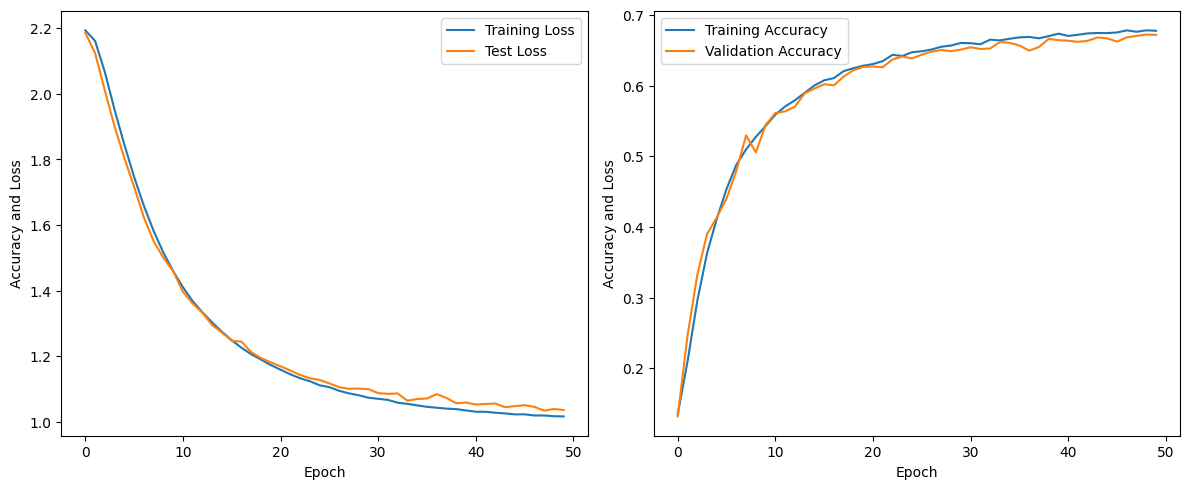

In [37]:
from helper import visualize_perform
visualize_perform(history_2_3)

In [38]:
prediction = model_2_3.predict(X_test)

actual = y_test.values

print(actual)
print(np.argmax(prediction, axis=1))

270/270 [==============================] - 0s 649us/step
[5 4 4 ... 1 2 7]
[5 4 4 ... 1 2 7]


In [39]:
from sklearn.metrics import classification_report

report = classification_report(actual, np.argmax(prediction, axis=1), target_names=label)
print("Laporan Klasifikasi:\n", report)

Laporan Klasifikasi:
               precision    recall  f1-score   support

Asam Lambung       0.65      0.56      0.60       960
       Batuk       0.68      0.71      0.69       959
      Cedera       0.58      0.43      0.49       960
       Demam       0.53      0.58      0.55       960
       Gatal       0.66      0.76      0.71       960
        Gigi       0.92      0.84      0.88       960
     Jerawat       0.67      0.75      0.71       960
  Menstruasi       0.75      0.77      0.76       960
Sakit Kepala       0.62      0.64      0.63       960

    accuracy                           0.67      8639
   macro avg       0.67      0.67      0.67      8639
weighted avg       0.67      0.67      0.67      8639



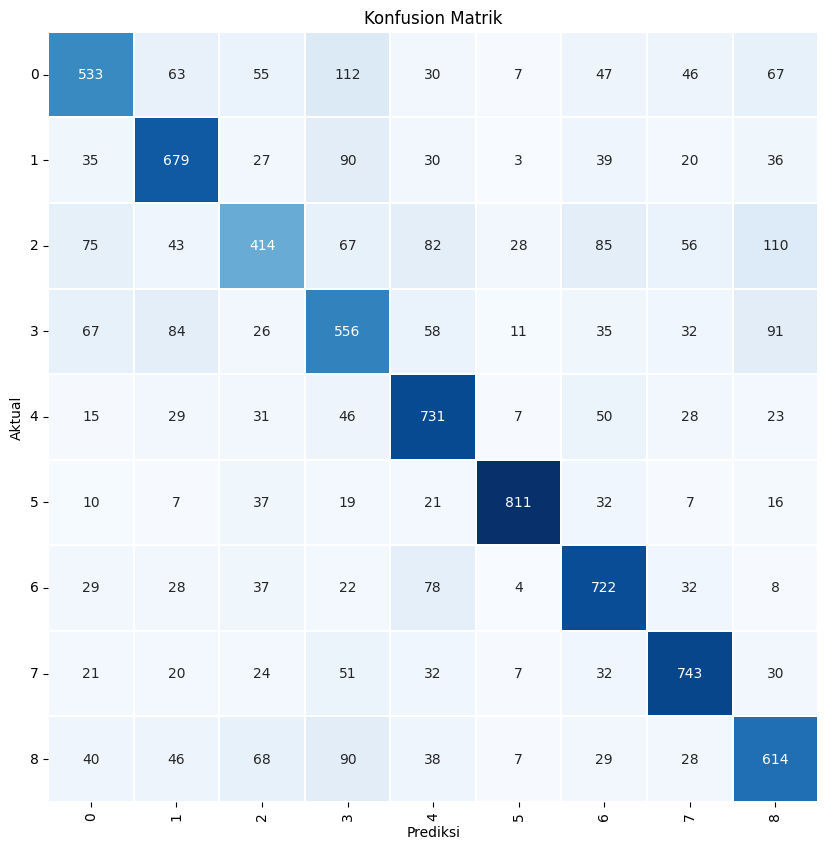

In [40]:
from helper import visualize_matrix
visualize_matrix(actual, prediction)

In [41]:
# model_2_3.save("../model/model_2p3_68_67.keras", save_format="keras")